### XGBoost Reference

https://xgboost.readthedocs.io/en/latest/tutorials/model.html
https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html
https://xgboost.readthedocs.io/en/latest/parameter.html

# Import packages

In [100]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

# Load data and Visualization

In [15]:
data = datasets.load_iris(as_frame=True)
X, y = data['data'], data['target']

print('Display examples of features')
display(X.head())
print('---', end='\n\n\n')
print('Display statistics')
display(X.describe())

Display examples of features


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


---


Display statistics


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


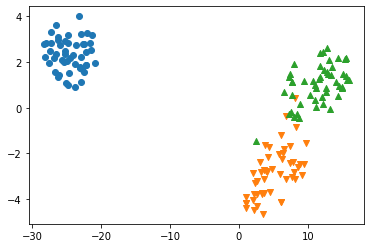

In [33]:
'''Visualize data'''
def visualize_iris(X, y):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c',]
    markers = ['o', 'v', '^']
    X = TSNE(init='pca', learning_rate='auto').fit_transform(X)
    plt.figure()
    for label in y.unique():
        x = X[y == label]
        plt.scatter(x[:, 0], x[:, 1], c=colors[label], marker=markers[label])
    plt.show()
    
visualize_iris(X, y)

# Train XGBoost

In [101]:
# setup parameters
params = {
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 2,
    'n_estimators': 1000,
    'reg_lambda': 1,
    'tree_method': 'auto',
    'predictor': 'auto',
    'objective': 'multi:softprob',
    'eval_metric': 'merror'
}

# train with k = 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = []
for fold, (idx_train, idx_valid) in enumerate(skf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
    model = XGBClassifier(**params)
    model.fit(X_train,y_train,
              eval_set=[(X_train, y_train),(X_valid,y_valid)],
              early_stopping_rounds=20,
              verbose=False)
    
    
    pred_valid = np.argmax(model.predict_proba(X_valid), axis=1)
    score = f1_score(y_valid, pred_valid, average='micro')
    scores.append(score)
    
    print(f"Fold: {fold + 1} Score: {score}")
    print('-'*40)
    
print(f"Overall Validation Score: {np.mean(scores)}")

Fold: 1 Score: 1.0
----------------------------------------
Fold: 2 Score: 0.9666666666666667
----------------------------------------
Fold: 3 Score: 0.8666666666666667
----------------------------------------
Fold: 4 Score: 0.9333333333333333
----------------------------------------
Fold: 5 Score: 0.9333333333333333
----------------------------------------
Overall Validation Score: 0.9400000000000001
